#### [ Fish 길이에 따른 무계 예측 - 다항회귀 PolynominlRegression] 
- 데이터셋 : fish.csv
- 피쳐 : 길이 Length
- 타겟 : 무게 Weight
- 학습방법 : 지도학습 - 회귀(Regression)
- 알고리즘 : LinearRegression

[1] 모듈로딩 및 데이터 준비<hr>

In [2]:
## [1-1] 모듈로딩
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [3]:
## [1-2] 데이터 준비
DATA_FILE = '../data/fish.csv'

In [4]:
## 데이터 로딩
## - 농어 생선의 무게와 길이 
fishDF = pd.read_csv(DATA_FILE, header=None, 
                     skiprows=73, skipfooter=31, 
                     usecols=[1,2], engine='python')
fishDF.head()

,1,2
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4


##

[2] 데이터 시각화 <hr>

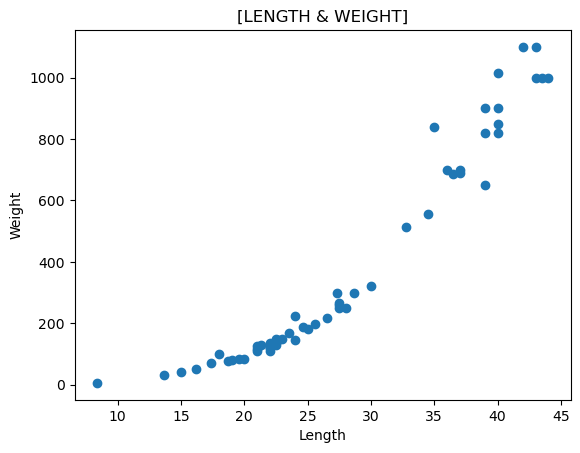

In [5]:
## 시각화 
## 1번 컬럼 =>  Weight,  2번 컬럼 => Length
plt.plot(fishDF[2], fishDF[1], 'o')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('[LENGTH & WEIGHT]')
plt.show()

[3] 데이터 셋 준비<hr>
- 피쳐와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 ==> 학습용과 테스트용으로만 분리

In [6]:
## [3-1] 피쳐와 타겟 분리 ==> 피쳐는 2D, 타겟 1D
featureDF = fishDF[fishDF.columns[-1:]]
targetSR  = fishDF[fishDF.columns[0]]

print(f'featureDF => {featureDF.ndim}D  {featureDF.shape}')
print(f'targetSR => {featureDF.ndim}D   {targetSR.shape}')

featureDF => 2D  (56, 1)
targetSR => 2D   (56,)


In [7]:
## [3-2] 데이터셋 분리 => 학습용 : 테스트용 = 75 : 25
X_train, X_test, y_train, y_test = train_test_split(featureDF, 
                                                    targetSR, 
                                                    random_state=42)

print(f'X_train => {X_train.ndim}D  {X_train.shape} y_train => {y_train.ndim}D  {y_train.shape}')
print(f'X_test => {X_test.ndim}D   {X_test.shape} y_test => {y_test.ndim}D   {y_test.shape}')

X_train => 2D  (42, 1) y_train => 1D  (42,)
X_test => 2D   (14, 1) y_test => 1D   (14,)


[4] 학습 진행 <hr>

In [8]:
## [4-1] 알고리즘 객체 생성
model = LinearRegression()

## [4-2] 학습 => 학습용데이터셋 사용 : 규칙/패턴 X 즉, 모델 없음 
model.fit(X_train, y_train)

LinearRegression()

In [9]:
## => fit 후 학습데이터 확인
print( model.coef_)
print( model.intercept_)

[39.01714496]
-709.0186449535477


[5] 학습 평가 <hr>
- 모델 적합도 평가 : score()
- 비용 계산 평가 : rmse(), mse(), mae()

In [10]:
## - 학습용, 테스트용 DS에 대한 모델 적합도, 비용 계산 
result=[]

for data, label in [[X_train, y_train], [X_test, y_test]]:
    ## - 모델 성능 평가 ==> score(2D_피쳐, 1D_타겟) : 모델 적합도
    score = model.score(data, label)

    ## - 손실 계산 평가 ==> rmse, mse, mae....(1D_타겟, 1D_예측값)
    pre_label = model.predict(data)
    rmse = root_mean_squared_error(label, pre_label)
    mse = mean_squared_error(label, pre_label)
    mae = mean_absolute_error(label,pre_label)

    result.append([score, rmse, mse, mae])

In [11]:
## 성능평가 결과 
resultDF = pd.DataFrame(result, 
                        columns=['score','rmse','mse','mae'],
                        index=['Train','Test'])

In [12]:
## - 훈련용과 테스트용 성능 차이 행 추가 
resultDF.loc['diff']= (resultDF.loc['Train']  - resultDF.loc['Test']).abs()
resultDF

,score,rmse,mse,mae
Train,0.939846,86.156564,7422.953553,64.893833
Test,0.824750,132.628300,17590.265978,94.461229
diff,0.115096,46.471736,10167.312425,29.567397


- [학습 결과 분석]
    * 모델 적합도 : Train > Test : 과대적합 
    * 비용 계산값 : Train < Test : 과대적합

- [해결방안]
    * 과도한  반복 학습 => scikit-learn에서는 개발자 제어 불가 X
    * 모델 복잡한가?  => 피쳐가 많은가? 피쳐는 1개 밖에 없음
    * 데이터가 충분한가? => 데이터 충분하지 않음!
    * 해당 알고리즘의 결과물 분석 => 선형식과 데이터의 관계 => 완벽한 선형이 아님.. 오히려 곡선! 


In [13]:
## y = WX+b
y = X_train*model.coef_[0]+model.intercept_

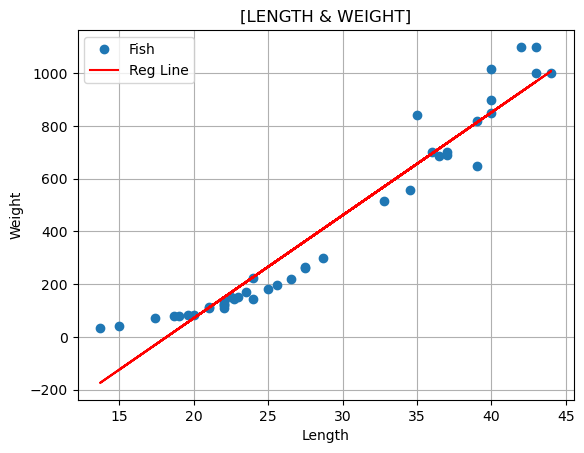

In [14]:
## 시각화 및 회귀선 ---------------------------------------------------
## 데이터 시각화
plt.plot(X_train, y_train, 'o', label='Fish')

# 선형회귀에서 구한 y=model.coef_*x+model.intercept_ 공식의 직선 긋기
plt.plot(X_train, y, 'r-', label='Reg Line')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('[LENGTH & WEIGHT]')
plt.legend()
plt.grid()
plt.show()

### [ 모델 성능평가에서의 문제점 개선을 위해서 추가 작업 ]
- 손실/비용함수 값이 큼 ==> 직선을 곡선의 형태 수식 
- 기존 존재하는 피쳐를 활용해서 피쳐 생성 ==>  다항회귀 

[6] 특성공학 => 피쳐 생성 후 추가 <hr>
- 관련 모듈 로딩 
- 학습 진행 전에 전처리 단계에서 피쳐 추가 

In [15]:
## [6-1] 모듈로딩
from sklearn.preprocessing import PolynomialFeatures

In [16]:
## [6-2] PolynomialFeatures 클래스 사용법
## - 임시데이터
X = [[2]]

## - 객체/인스턴스 생성 : [기본 : 차수 2]
poly = PolynomialFeatures(degree=2)

## - 객체/인스턴스에 피쳐 생성할 정보 제공
poly.fit(X)

print('n_features_in_     :' , poly.n_features_in_)
print('n_output_features_ :' , poly.n_output_features_)

## - 피쳐를 생성해서 추가
poly.transform(X)

n_features_in_     : 1
n_output_features_ : 3


array([[1., 2., 4.]])

In [17]:
## - 객체/인스턴스 생성 : [기본 : 차수 2]
poly = PolynomialFeatures(interaction_only=True)  # 피쳐끼리 곱셈값만 적용

## - 객체/인스턴스에 피쳐 생성할 정보 제공
poly.fit(X)

print('n_features_in_     :' , poly.n_features_in_)
print('n_output_features_ :' , poly.n_output_features_)

## - 피쳐를 생성해서 추가
poly.transform(X)

n_features_in_     : 1
n_output_features_ : 2


array([[1., 2.]])

In [18]:
## - 객체/인스턴스 생성 : [기본 : 차수 2]
poly = PolynomialFeatures(include_bias=False)  # 절편값 1 제외

## - 객체/인스턴스에 피쳐 생성할 정보 제공
poly.fit(X)

print('n_features_in_     :' , poly.n_features_in_)
print('n_output_features_ :' , poly.n_output_features_)

## - 피쳐를 생성해서 추가
poly.transform(X)

n_features_in_     : 1
n_output_features_ : 2


array([[2., 4.]])

In [19]:
## - 객체/인스턴스 생성 : [기본 : 차수 2]
poly = PolynomialFeatures(include_bias=False)  # 절편값 1 제외

## - 객체/인스턴스에 피쳐 생성할 정보 제공 + 피쳐 생성 후 추가 
X2=poly.fit_transform(X)

print('n_features_in_     :' , poly.n_features_in_)
print('n_output_features_ :' , poly.n_output_features_)
print(X2)

n_features_in_     : 1
n_output_features_ : 2
[[2. 4.]]


In [20]:
## [6-3] 데이터셋 즉, 학습용/테스트용 데이터셋 피쳐 추가 
## - 학 습 용 : X_train
## - 테스트용 : X_test 
## -> 학습용 데이터셋으로 피쳐 추가 정보 제공
poly = PolynomialFeatures() 

## -> 학습용 피쳐 제공
poly.fit(X_train)

## -> 학습용/테스트용 피쳐 추가 
poly_train = poly.transform(X_train)
poly_test  = poly.transform(X_test)

In [21]:
print(f'[학 습 용 피쳐 ] => {type(poly_train)}, {poly_train.shape}')
print(f'[테스트용 피쳐 ] => {type(poly_test)}, {poly_test.shape}')

[학 습 용 피쳐 ] => <class 'numpy.ndarray'>, (42, 3)
[테스트용 피쳐 ] => <class 'numpy.ndarray'>, (14, 3)


[7] 재학습 <hr>

In [22]:
## - 선형회귀인스턴스 생성
polyModel = LinearRegression()

## - 학습
polyModel.fit(poly_train, y_train)


LinearRegression()

In [23]:
# - 모델 파라미터
print(f'coef_      : {polyModel.coef_}')
print(f'intercept_ : {polyModel.intercept_}')

coef_      : [  0.         -21.55792498   1.01433211]
intercept_ : 116.05021078278179


[8] 재학습 평가 <hr>

In [24]:
## [8-1] 시각화 - 곡선 회귀선 
import numpy as np

print( "min :", X_train.min().values[0], "max :", X_train.max().values[0] )
min_x, max_x = X_train.min().values[0], X_train.max().values[0]

## - 곡선 회귀식에 대입할 데이터 
x=np.linspace(min_x, max_x)  # 1<= ~ <=42 범위에서 균등하게 50개[기본값] 데이터 생성 
print('shape :' , x.shape)
print(x)


min : 13.7 max : 44.0
shape : (50,)
[13.7        14.31836735 14.93673469 15.55510204 16.17346939 16.79183673
 17.41020408 18.02857143 18.64693878 19.26530612 19.88367347 20.50204082
 21.12040816 21.73877551 22.35714286 22.9755102  23.59387755 24.2122449
 24.83061224 25.44897959 26.06734694 26.68571429 27.30408163 27.92244898
 28.54081633 29.15918367 29.77755102 30.39591837 31.01428571 31.63265306
 32.25102041 32.86938776 33.4877551  34.10612245 34.7244898  35.34285714
 35.96122449 36.57959184 37.19795918 37.81632653 38.43469388 39.05306122
 39.67142857 40.28979592 40.90816327 41.52653061 42.14489796 42.76326531
 43.38163265 44.        ]


In [25]:
print( "min :", X_train.min().values[0], "max :", X_train.max().values[0] )

min : 13.7 max : 44.0


In [26]:
## - 곡선 회귀식 : y = x^0*W0 + x^1*W1 x^2*W2 + b
y = (1*polyModel.coef_[0]) + (x * polyModel.coef_[1]) + ((x**2)*polyModel.coef_[2]) + polyModel.intercept_

print('shape :' , y.shape)
print(y)

shape : (50,)
[  11.08663218   15.32987181   20.34882835   26.14350183   32.71389222
   40.05999954   48.18182378   57.07936494   66.75262303   77.20159804
   88.42628997  100.42669883  113.20282461  126.75466731  141.08222694
  156.18550349  172.06449696  188.71920735  206.14963467  224.35577892
  243.33764008  263.09521817  283.62851318  304.93752512  327.02225397
  349.88269976  373.51886246  397.93074209  423.11833864  449.08165211
  475.82068251  503.33542983  531.62589407  560.69207524  590.53397333
  621.15158835  652.54492028  684.71396914  717.65873492  751.37921763
  785.87541726  821.14733381  857.19496729  894.01831769  931.61738501
  969.99216925 1009.14267042 1049.06888851 1089.77082353 1131.24847547]


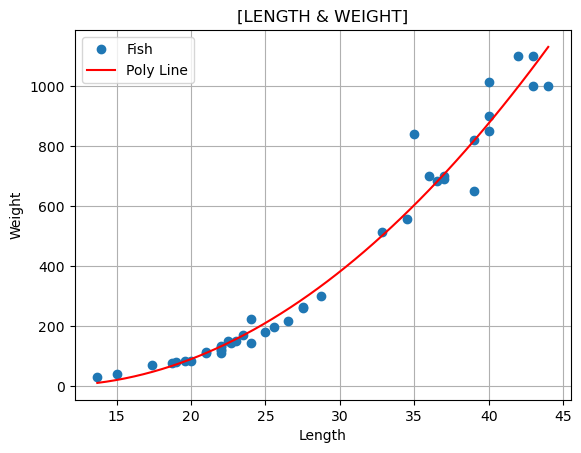

In [27]:
## 시각화 및 회귀선 -----------------------------------
## 데이터 시각화
plt.plot(X_train, y_train, 'o', label='Fish')

# 선형회귀에서 구한 y=model.coef_*x+model.intercept_ 공식의 직선 긋기
plt.plot(x, y, 'r-', label='Poly Line')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('[LENGTH & WEIGHT]')
plt.legend()
plt.grid()
plt.show()

In [28]:
## [8-2] 성능평가 -----------------------------------------------------------
## - 학습용, 테스트용 DS에 대한 모델 적합도, 비용 계산 
result=[]  

for data, label in [[poly_train, y_train], [poly_test, y_test]]:
    ## - 모델 성능 평가 ==> score(2D_피쳐, 1D_타겟) : 모델 적합도
    score = polyModel.score(data, label)

    ## - 손실 계산 평가 ==> rmse, mse, mae....(1D_타겟, 1D_예측값)
    pre_label = polyModel.predict(data)
    rmse = root_mean_squared_error(label, pre_label)
    mse = mean_squared_error(label, pre_label)
    mae = mean_absolute_error(label,pre_label)

    result.append([score, rmse, mse, mae])

In [29]:

resultDF.loc['polyTrain'] = result[0]
resultDF.loc['polyTest']  = result[1]
## - 훈련용과 테스트용 성능 차이 행 추가 
resultDF.loc['polyDiff']= (resultDF.loc['polyTrain']  - resultDF.loc['polyTest']).abs()
resultDF

,score,rmse,mse,mae
Train,0.939846,86.156564,7422.953553,64.893833
Test,0.824750,132.628300,17590.265978,94.461229
diff,0.115096,46.471736,10167.312425,29.567397
polyTrain,0.970681,60.149744,3617.991740,34.996086
polyTest,0.977594,47.423596,2248.997469,37.766063
polyDiff,0.006913,12.726148,1368.994271,2.769977


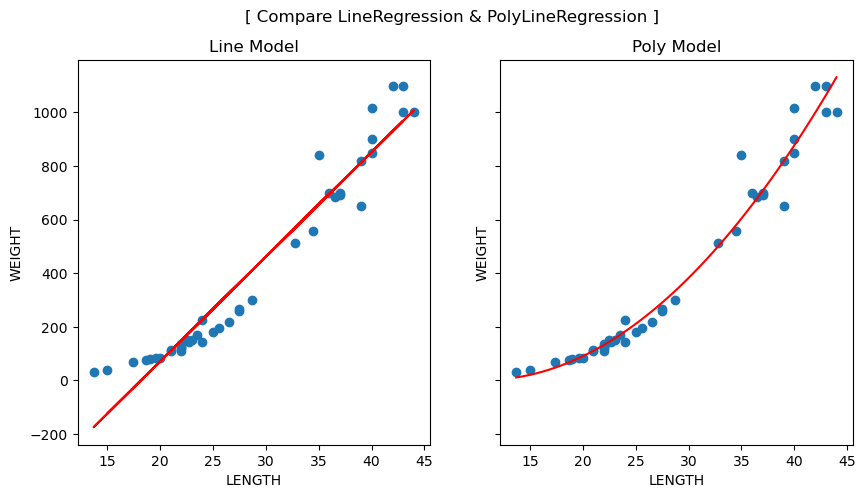

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5), sharey=True)

axes = axes.flatten()                               
data_label = [[X_train, model.predict(X_train)], [x, y]]

for ax, title, data in zip(axes, ["Line Model", "Poly Model"],data_label):
    ax.plot(X_train, y_train, 'o', label='Fish')
    ax.plot(data[0], data[1], 'r-', label='Poly Line')
    ax.set_xlabel("LENGTH")
    ax.set_ylabel("WEIGHT")
    ax.set_title(title)

plt.suptitle("[ Compare LineRegression & PolyLineRegression ]")
plt.show()